In [1]:
%matplotlib inline

from time import time
from math import sqrt, floor
import numpy as np
import pandas as pd
from IPython.core.debugger import set_trace
from pandas.plotting import scatter_matrix
pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
plt.style.use = "default"

In [2]:
train = pd.read_csv("TestData3.txt", sep='\t', header=None)
labels = pd.read_csv("TrainLabel3.txt", sep='\t')

In [3]:
def merge(df, labels):
    return labels.merge(df, left_index=True,right_index=True)

In [4]:
train.describe()

,2,1,5,4,5.1,5.2,3,3.1,0,1.1,1.2,7,1.00000000000000e+99
count,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000
mean,1.549,15081759009366565475075206837321054786758927807...,3.419,84140339736466101525007704440573712235669696698...,14764248293379903375081897091598533528237858197...,11160501666931258185956390450631184127431424003...,1.565,40323860930306397829715108233681714277246855199...,0.688,28099698364819812123093179813937354834834756089...,41276393078266399306795757984357644611106211088...,84140339736466101525007704440573712235669696698...,31274805524686459682952538169802208897063709544...
std,0.498,12188789164076044044451331710942527557035600674...,1.639,91348578259235134075116565577595690931514818855...,12061747356802259115770811964974419780942299105...,31490487438481606899512278635074439934092021882...,0.750,19673330078059402694401861551167680521493228084...,1.114,16527081300273622450003915733358846537988747250...,19894455463982942781648692593712505978915414506...,91348578259235118898015845064087324373218671797...,17407326787870364207746959122767712727810600051...
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000
25%,1.000,1.000,2.000,3.000,1.000,4.000,1.000,2.000,0.000,1.000,1.000,5.000,1.000
50%,2.000,3.000,3.000,4.000,4.000,5.000,1.000,3.000,0.000,2.000,1.000,7.000,1.000
75%,2.000,5.000,4.000,5.000,6.000,5.000,2.000,4.000,1.000,2.000,3.000,7.000,1.000
max,2.000,10000000000000000887529745682247582063159023622...,7.000,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,3.000,10000000000000000887529745682247582063159023622...,9.000,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...


In [5]:
train.shape

(6299, 13)

In [6]:
labels["9"].value_counts()

1    1235
8     912
6     777
7     677
9     595
4     566
2     554
5     495
3     488
Name: 9, dtype: int64

Looks like we have the same problem as in 1.1 - let's checkout how many huge numbers we have, the stats for the columns without them, and what we could replace them with.

In [7]:
problem_cols = []
for col in train.columns:
    if train[col].mean() < train[col].std():
        problem_cols.append(col)

In [8]:
# for each col, get all rows w./ higher than mean
errors = train[problem_cols].apply(lambda x: x[x > x.mean()])
errors.describe()

,1,4,5.1,5.2,3.1,0,1.1,1.2,7,1.00000000000000e+99
count,95.000,53.000,93.000,703.000,254.000,2334.000,177.000,260.000,53.000,197.000
mean,99999999999999996733616880411669127384953318580...,99999999999999996733616880411669127384953318580...,10000000000000000887529745682247582063159023622...,99999999999999996733616880411669127384953318580...,99999999999999996733616880411669127384953318580...,1.856,10000000000000002101697803323328251387822715387...,99999999999999996733616880411669127384953318580...,99999999999999996733616880411669127384953318580...,99999999999999984591936304000862434138316400933...
std,12206093126961436357020372089897384019742301602...,12257871554667940726284125276446968176775725314...,0.000,12150325419497057736474907176200719380255315802...,12165652328428205700581341691078943145434041435...,1.086,12176125129518946039335959157625703400278994750...,12165097532739187816908670293845506999675503820...,12257871554667940726284125276446968176775725314...,24345229689151450498680459539680624812893525887...
min,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,1.000,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...
25%,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,1.000,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...
50%,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,2.000,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...
75%,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,2.000,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...
max,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,9.000,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...


Looks like 0 doesn't belong - lets remove it and all the error values. replace them with the mean.

In [9]:
errors.drop(0)
problem_cols.pop(problem_cols.index("0"))

'0'

In [10]:
train[problem_cols].apply(lambda x: x[x < x.mean()]).describe()

,1,4,5.1,5.2,3.1,1.1,1.2,7,1.00000000000000e+99
count,6204.000,6246.000,6206.000,5596.000,6045.000,6122.000,6039.000,6246.000,6102.000
mean,3.013,3.821,3.786,4.197,2.891,1.827,1.835,5.951,1.128
std,1.815,1.221,2.547,1.230,1.560,0.746,1.153,1.746,0.414
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
25%,1.000,3.000,1.000,4.000,2.000,1.000,1.000,5.000,1.000
50%,3.000,4.000,4.000,5.000,3.000,2.000,1.000,7.000,1.000
75%,5.000,5.000,6.000,5.000,4.000,2.000,3.000,7.000,1.000
max,5.000,6.000,9.000,5.000,9.000,3.000,5.000,8.000,3.000


In [11]:
errors.apply(lambda x: x.dropna().value_counts() / x.dropna().shape[0])

,1,4,5.1,5.2,3.1,0,1.1,1.2,7,1.00000000000000e+99
1.000,nan,nan,nan,nan,nan,0.461,nan,nan,nan,nan
2.000,nan,nan,nan,nan,nan,0.342,nan,nan,nan,nan
3.000,nan,nan,nan,nan,nan,0.129,nan,nan,nan,nan
4.000,nan,nan,nan,nan,nan,0.038,nan,nan,nan,nan
5.000,nan,nan,nan,nan,nan,0.015,nan,nan,nan,nan
6.000,nan,nan,nan,nan,nan,0.009,nan,nan,nan,nan
7.000,nan,nan,nan,nan,nan,0.003,nan,nan,nan,nan
8.000,nan,nan,nan,nan,nan,0.001,nan,nan,nan,nan
9.000,nan,nan,nan,nan,nan,0.001,nan,nan,nan,nan
10000000000000000887529745682247582063159023622...,1.000,1.000,1.000,1.000,1.000,nan,1.000,1.000,1.000,1.000


In [12]:
for col in problem_cols:
    train_col = train[col]
    gt_mean = train_col > train_col.mean()
    new_col_mean = train_col[~gt_mean].mean()
    
    train[col][gt_mean] = new_col_mean

train.describe()

/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,2,1,5,4,5.1,5.2,3,3.1,0,1.1,1.2,7,1.00000000000000e+99
count,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000,6299.000
mean,1.549,3.013,3.419,3.821,3.786,4.197,1.565,2.891,0.688,1.827,1.835,5.951,1.128
std,0.498,1.801,1.639,1.216,2.528,1.160,0.750,1.528,1.114,0.736,1.128,1.738,0.407
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000
25%,1.000,1.000,2.000,3.000,1.000,4.000,1.000,2.000,0.000,1.000,1.000,5.000,1.000
50%,2.000,3.000,3.000,4.000,3.786,5.000,1.000,2.891,0.000,2.000,1.000,7.000,1.000
75%,2.000,5.000,4.000,5.000,6.000,5.000,2.000,4.000,1.000,2.000,3.000,7.000,1.000
max,2.000,5.000,7.000,6.000,9.000,5.000,3.000,9.000,9.000,3.000,5.000,8.000,3.000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dab3e48>,
      dtype=object)

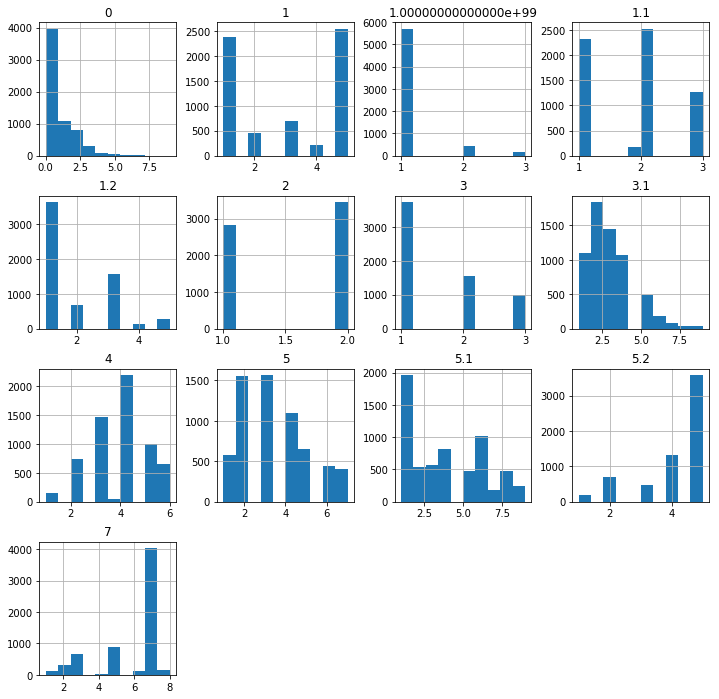

In [63]:
train.hist(figsize=(12,12))

Looks like there's a lot of the duplicated values. Lets check it out

In [73]:
train.apply(lambda x: x.value_counts())

,2,1,5,4,5.1,5.2,3,3.1,0,1.1,1.2,7,1.00000000000000e+99
0.000,nan,nan,nan,nan,nan,nan,nan,nan,3965.000,nan,nan,nan,nan
1.000,2838.000,2391.000,578.000,158.000,1965.000,204.000,3736.000,1100.000,1077.000,2327.000,3642.000,109.000,5501.000
1.128,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,197.000
1.827,nan,nan,nan,nan,nan,nan,nan,nan,nan,177.000,nan,nan,nan
1.835,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,260.000,nan,nan
2.000,3461.000,453.000,1554.000,745.000,545.000,695.000,1565.000,1842.000,798.000,2528.000,425.000,303.000,420.000
2.891,nan,nan,nan,nan,nan,nan,nan,254.000,nan,nan,nan,nan,nan
3.000,nan,596.000,1568.000,1478.000,569.000,483.000,998.000,1194.000,301.000,1267.000,1575.000,655.000,181.000
3.013,nan,95.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3.786,nan,nan,nan,nan,93.000,nan,nan,nan,nan,nan,nan,nan,nan


In [25]:
corr = train.corr()
corr

,2,1,5,4,5.1,5.2,3,3.1,0,1.1,1.2,7,1.00000000000000e+99
2,1.000,-0.089,0.031,-0.059,0.031,0.073,0.058,0.056,0.073,-0.044,-0.037,0.046,-0.064
1,-0.089,1.000,-0.490,-0.221,0.148,-0.075,-0.796,-0.015,-0.031,0.575,0.137,-0.088,0.050
5,0.031,-0.490,1.000,0.322,0.030,0.178,0.432,-0.284,-0.252,-0.614,-0.081,0.179,-0.100
4,-0.059,-0.221,0.322,1.000,-0.341,-0.057,0.133,-0.286,-0.268,-0.401,0.011,0.141,-0.118
5.1,0.031,0.148,0.030,-0.341,1.000,0.005,0.024,0.090,0.060,0.200,0.038,-0.052,0.039
5.2,0.073,-0.075,0.178,-0.057,0.005,1.000,0.077,0.049,0.058,-0.088,-0.223,0.005,-0.080
3,0.058,-0.796,0.432,0.133,0.024,0.077,1.000,0.080,0.069,-0.475,-0.167,0.083,-0.024
3.1,0.056,-0.015,-0.284,-0.286,0.090,0.049,0.080,1.000,0.697,0.235,-0.278,-0.151,0.175
0,0.073,-0.031,-0.252,-0.268,0.060,0.058,0.069,0.697,1.000,0.163,-0.184,-0.130,0.120
1.1,-0.044,0.575,-0.614,-0.401,0.200,-0.088,-0.475,0.235,0.163,1.000,0.113,-0.138,0.108


In [52]:
corr[np.abs(corr) > .7 ]

,2,1,5,4,5.1,5.2,3,3.1,0,1.1,1.2,7,1.00000000000000e+99
2,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,1.000,nan,nan,nan,nan,-0.796,nan,nan,nan,nan,nan,nan
5,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan
5.1,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan
5.2,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan
3,nan,-0.796,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan
3.1,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan
0,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan
1.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan


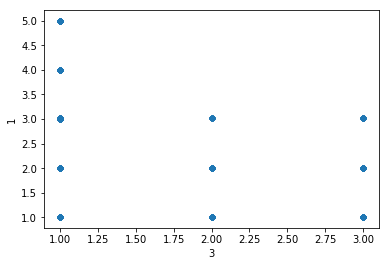

In [53]:
train.plot.scatter("3", "1")

In [76]:
train = train.astype("int32")

In [77]:
train.to_csv("cleaned_test.csv")
labels.to_csv("cleaned_label.csv")